***CodSoft Data Science Internship***

**Name:** Naga Hari Priyan M

**Batch:** JAN BATCH A27

**Task number:** 3

**Task:** Iris Classification

**What I am going to do ?**

Data Collection -> Exploratory Data Analysis -> Preprocession -> Model Selection -> Prediction

# ***Data Collection***

***Import libraries***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

***Reading the Dataset***

In [2]:
data = pd.read_csv(r"D:/Codsoft\Dataset/iris/IRIS.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# ***Exploratory Data Analysis***

In [3]:
data.shape

(150, 5)

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

I am going to change their name for simplicity

In [9]:
data.species.replace({
    "Iris-setosa": "setosa",
    "Iris-versicolor" :"versicolor",
    "Iris-virginica" : "virginica"
}, inplace= True)

In [10]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


**Correlation**

In [11]:
correlation_matrix = data[['sepal_length','sepal_width','petal_length','petal_width']].corr()

In [12]:
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


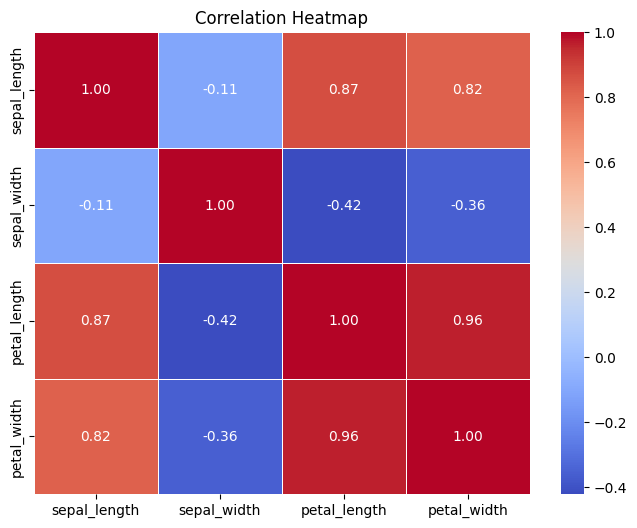

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Visualization

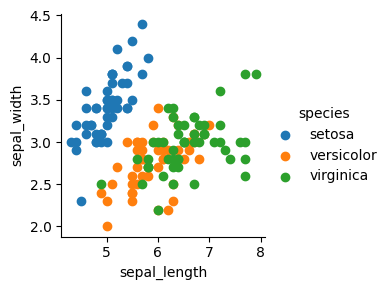

In [15]:
sns.FacetGrid(data, hue='species').map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

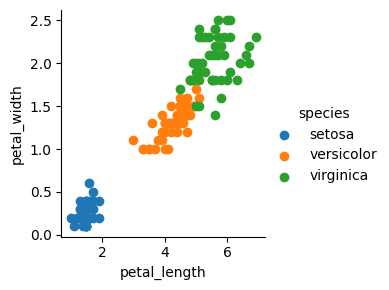

In [16]:
sns.FacetGrid(data, hue='species').map(plt.scatter, 'petal_length', 'petal_width').add_legend()

**Pair Plot**

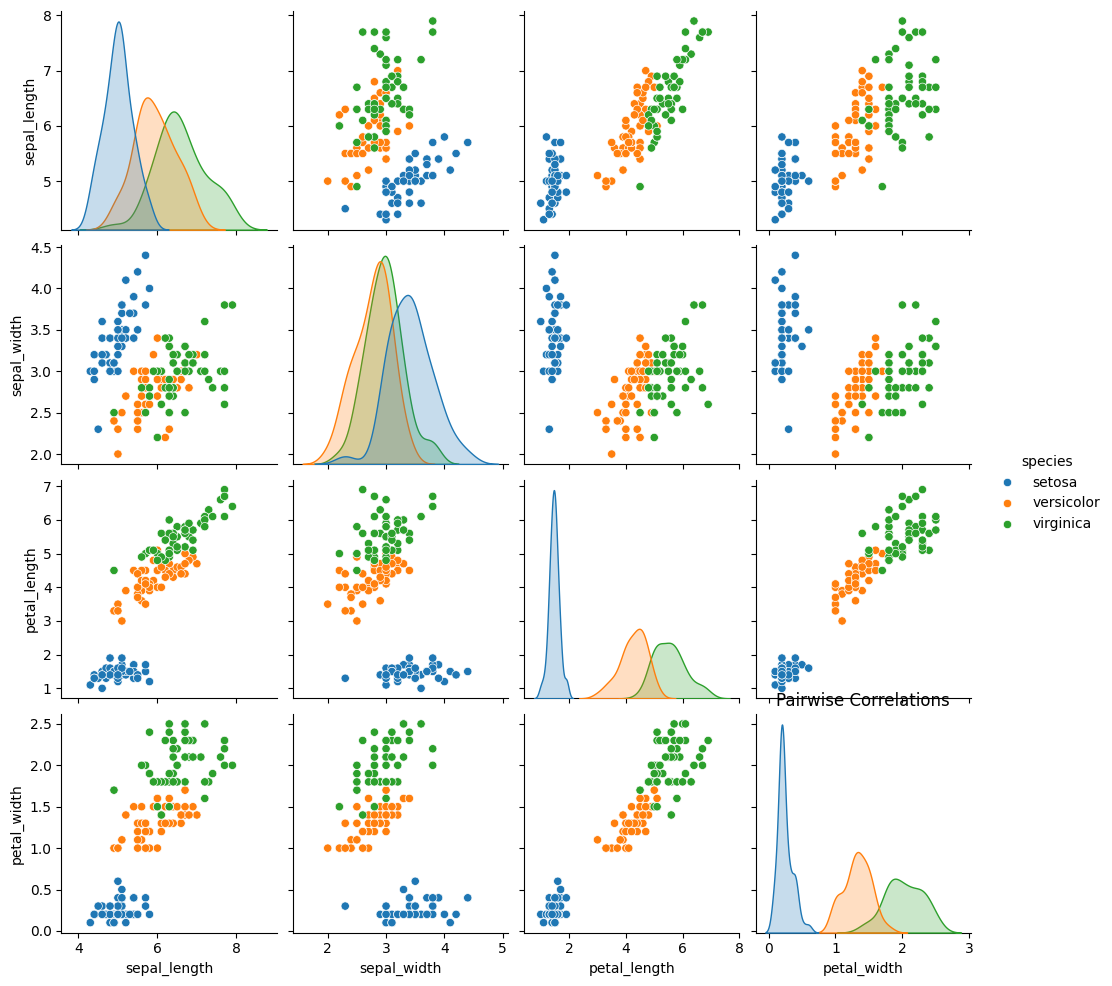

In [17]:
sns.pairplot(data, hue='species')
plt.title('Pairwise Correlations')
plt.show()

**Histogram**

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func

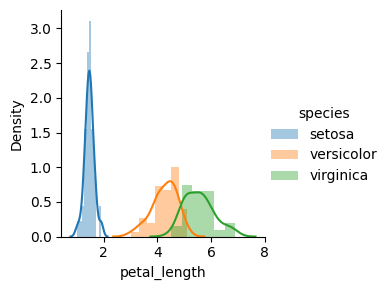

In [18]:
sns.FacetGrid(data, hue='species').map(sns.distplot, 'petal_length').add_legend()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func

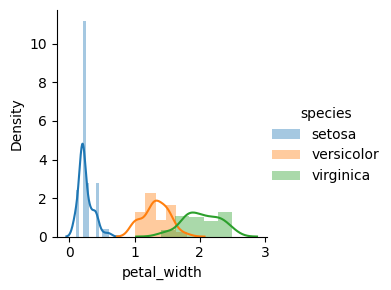

In [19]:
sns.FacetGrid(data, hue='species').map(sns.distplot, 'petal_width').add_legend()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func

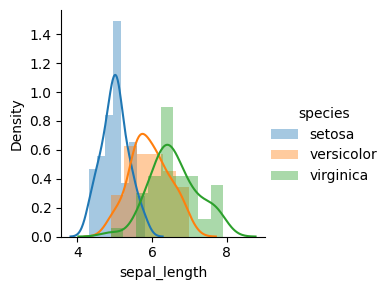

In [20]:
sns.FacetGrid(data, hue='species').map(sns.distplot, 'sepal_length').add_legend()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func

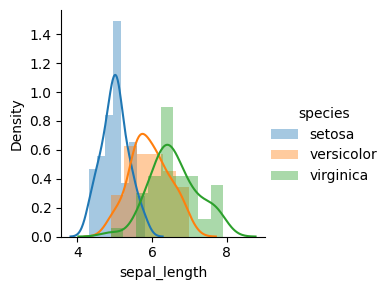

In [21]:
sns.FacetGrid(data, hue='species').map(sns.distplot, 'sepal_length').add_legend()

**Box Plot for Outlier Identification**

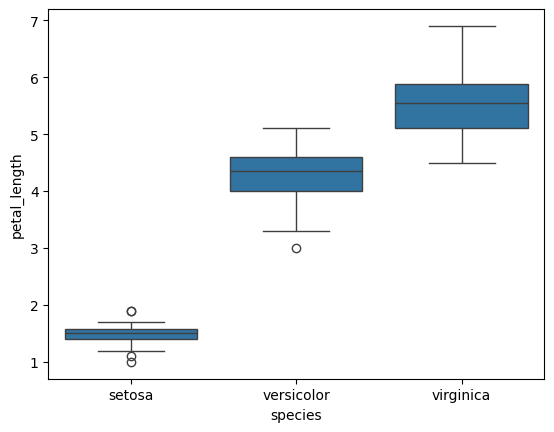

In [22]:
sns.boxplot(x = 'species', y = 'petal_length', data=data)
plt.show()

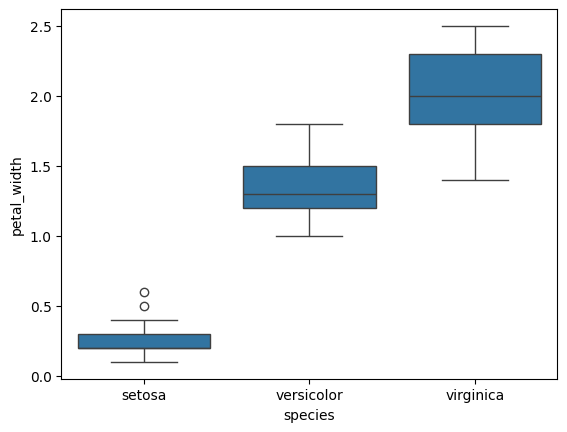

In [23]:
sns.boxplot(x = 'species', y = 'petal_width', data=data)
plt.show()

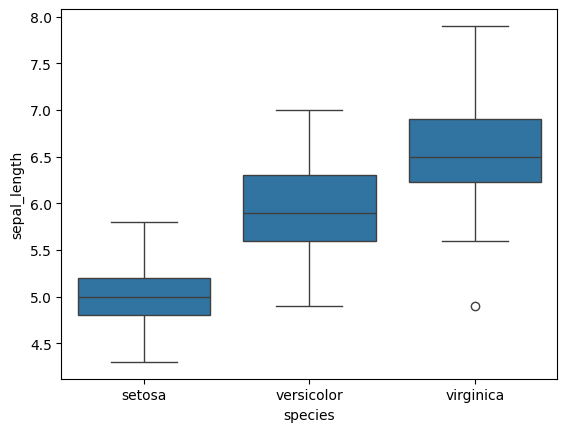

In [24]:
sns.boxplot(x = 'species', y = 'sepal_length', data=data)
plt.show()

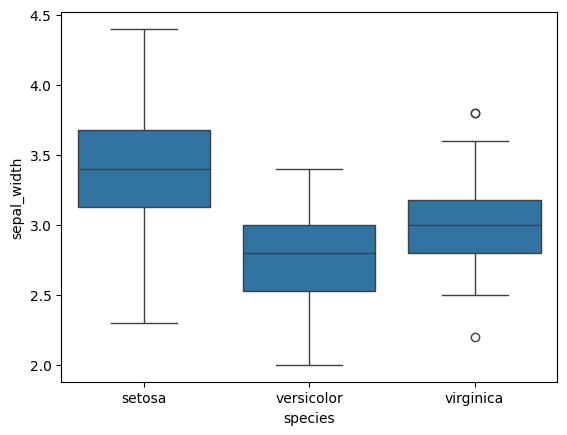

In [25]:
sns.boxplot(x = 'species', y = 'sepal_width', data=data)
plt.show()

# ***Preprocessing***

### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [27]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [28]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [29]:
scale = scale.fit(x)

In [30]:
x_scaled = scale.transform(x)

In [31]:
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [33]:
y = enc.fit_transform(y)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## **Splitting Data**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# ***Model Selection***

## **Support Vector Classifier**

In [36]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [37]:
svc_pred = svc.predict(x_test)

In [38]:
print(f'Accuracy of SVM model is: {accuracy_score(y_test, svc_pred)}')

Accuracy of SVM model is: 1.0


Seems our model is predicting 100 % correctly

## **KNN classifier**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_pred = knn.predict(x_test)

In [41]:
print(f'Accuracy of KNN Classifier model is: {accuracy_score(y_test, knn_pred)}')

Accuracy of KNN Classifier model is: 1.0


## **Decision Tree Classifier**

In [42]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
dt_pred = dt.predict(x_test)

In [44]:
print(f'Accuracy of Decision Tree Classifier model is: {accuracy_score(y_test, dt_pred)}')

Accuracy of Decision Tree Classifier model is: 0.9666666666666667


In [45]:
dt_1 = DecisionTreeClassifier(max_depth=3)
dt_1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
dt_1_pred = dt_1.predict(x_test)

In [47]:
print(f'Accuracy of Decision Tree Classifier with depth of 3 model is: {accuracy_score(y_test, dt_1_pred)}')

Accuracy of Decision Tree Classifier with depth of 3 model is: 1.0


# ***Scaled Model***

In [48]:
scaled_xtr, scaled_xte, scaled_ytr, scaled_yte = train_test_split(x_scaled,y, test_size=0.3,random_state=43)

In [50]:
svc_sc = SVC(kernel='linear')
svc_sc.fit(scaled_xtr, scaled_ytr)

SVC(kernel='linear')

In [52]:
svc_sc_pred = svc_sc.predict(scaled_xte)

In [53]:
print(f'Accuracy of SVM_scaled model is: {accuracy_score(scaled_yte, svc_sc_pred)}')

Accuracy of SVM_scaled model is: 0.9777777777777777
